In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
np.random.seed(2)

Using TensorFlow backend.


In [2]:
#importing the dataset
data= pd.read_csv('input/creditcard.csv', sep= ',')


# Data Exploration

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#Pre-procession
from sklearn.preprocessing import StandardScaler
data['normalisedAmount']= StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data=data.drop(columns=['Amount'])

In [7]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalisedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [4]:
data=data.drop(columns=['Time'])

In [9]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalisedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [5]:
x= data.iloc[:, data.columns!='Class']
y= data.iloc[:, data.columns =='Class']

In [12]:
x.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normalisedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [13]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.3, random_state= 12345)

In [7]:
x_train.shape

(199364, 29)

In [8]:
x_test.shape

(85443, 29)

In [9]:
x_train= np.array(x_train)
x_test=  np.array(x_test)
y_train= np.array(y_train)
y_test=  np.array(y_test)

In [10]:
# Deep Learning Model
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [11]:
model= Sequential([Dense(units=16, input_dim= 29, activation= 'relu'), 
                   Dense(units=24, activation= 'relu'), 
                   Dropout(0.5), 
                   Dense(units=20, activation= 'relu'), 
                   Dense(units=24, activation= 'relu'), 
                   Dense(1, activation= 'sigmoid'),
                  ])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
____________________________________________________

In [22]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=15, epochs=5)

Epoch 1/5
199364/199364 [==============================] - 155s 778us/step - loss: 0.0102 - accuracy: 0.9977
Epoch 2/5
199364/199364 [==============================] - 138s 693us/step - loss: 0.0040 - accuracy: 0.9993
Epoch 3/5
199364/199364 [==============================] - 111s 557us/step - loss: 0.0037 - accuracy: 0.9993
Epoch 4/5
199364/199364 [==============================] - 73s 368us/step - loss: 0.0035 - accuracy: 0.9993
Epoch 5/5
199364/199364 [==============================] - 73s 368us/step - loss: 0.0035 - accuracy: 0.9993


In [23]:
score= model.evaluate(x_test,y_test)

85443/85443 [==============================] - 8s 96us/step


In [24]:
score

[0.003786936484829913, 0.9994499087333679]

In [30]:
y_pred= model.predict(x_test).round()

In [31]:
y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

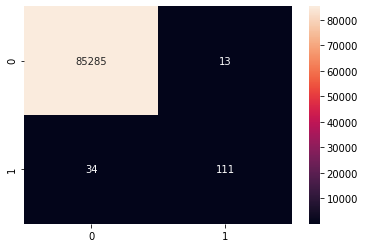

In [34]:
from sklearn.metrics import confusion_matrix, classification_report
cm= confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='.0f')

In [35]:
y_pred= model.predict(x).round()

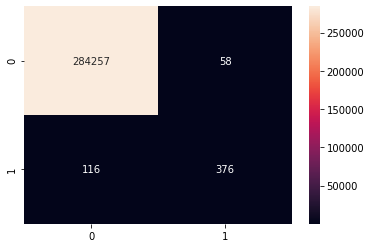

In [37]:
from sklearn.metrics import confusion_matrix, classification_report
cm= confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='.0f')

# Undersampling

In [13]:
fraud_indices= np.array(data[data.Class==1].index)
number_records_fraud= len(fraud_indices)
print(number_records_fraud)

492


In [14]:
normal_indices= data[data.Class==0].index

In [15]:
random_normal_indices= np.array(np.random.choice(normal_indices, number_records_fraud, replace=False))
print(len(random_normal_indices))

492


In [16]:
under_sample_indices= np.concatenate([fraud_indices, random_normal_indices])
print(len(under_sample_indices))

984


In [17]:
under_sample_data = data.iloc[under_sample_indices,:] 
x_under_sample= under_sample_data.iloc[:,under_sample_data.columns!='Class']
y_under_sample= under_sample_data.iloc[:,under_sample_data.columns=='Class']


In [18]:
x_train, x_test, y_train, y_test= train_test_split(x_under_sample,y_under_sample, test_size=0.3, random_state= 12345)

In [45]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=15, epochs=5)

Epoch 1/5
688/688 [==============================] - 1s 903us/step - loss: 0.4003 - accuracy: 0.9012
Epoch 2/5
688/688 [==============================] - 0s 394us/step - loss: 0.1805 - accuracy: 0.9346
Epoch 3/5
688/688 [==============================] - 0s 378us/step - loss: 0.1344 - accuracy: 0.9506
Epoch 4/5
688/688 [==============================] - 0s 382us/step - loss: 0.1287 - accuracy: 0.9520
Epoch 5/5
688/688 [==============================] - 0s 381us/step - loss: 0.1164 - accuracy: 0.9535


In [46]:
y_pred= model.predict(x_test).round()

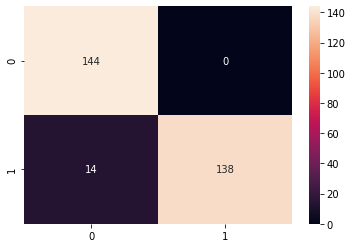

In [47]:
from sklearn.metrics import confusion_matrix, classification_report
cm= confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='.0f')

In [48]:
y_pred= model.predict(x).round()

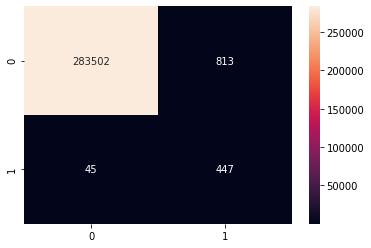

In [62]:
from sklearn.metrics import confusion_matrix, classification_report
cm= confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='.0f')

# SMOTE

In [21]:
from imblearn.over_sampling import SMOTE

In [22]:
x_resample, y_resample= SMOTE().fit_sample(x,y.values.ravel())

In [23]:
x_resample = pd.DataFrame(x_resample)
y_resample = pd.DataFrame(y_resample)

In [24]:
x_train, x_test, y_train, y_test= train_test_split(x_resample,y_resample, test_size=0.3, random_state= 12345)

In [25]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=15, epochs=5)

Epoch 1/5
398041/398041 [==============================] - 158s 397us/step - loss: 0.0440 - accuracy: 0.9844
Epoch 2/5
398041/398041 [==============================] - 150s 376us/step - loss: 0.0165 - accuracy: 0.9954
Epoch 3/5
398041/398041 [==============================] - 150s 378us/step - loss: 0.0133 - accuracy: 0.9964
Epoch 4/5
398041/398041 [==============================] - 151s 380us/step - loss: 0.0120 - accuracy: 0.9969
Epoch 5/5
398041/398041 [==============================] - 158s 398us/step - loss: 0.0110 - accuracy: 0.9973


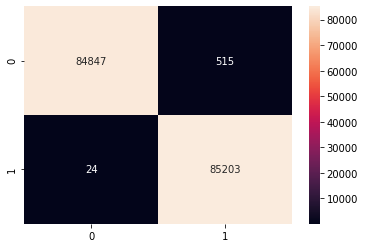

In [26]:
y_pred= model.predict(x_test).round()
from sklearn.metrics import confusion_matrix, classification_report
cm= confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='.0f')

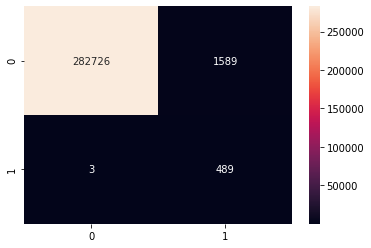

In [27]:
y_pred= model.predict(x).round()
from sklearn.metrics import confusion_matrix, classification_report
cm= confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='.0f')

In [28]:
score= model.evaluate(x,y)

284807/284807 [==============================] - 26s 92us/step


In [29]:
print(score[1])

0.9944102764129639
